# TEMPO Satellite Plots for July 2

On July 2nd, the B200 completed three flights: one planned for an 15:00 UTC (08:00 PDT) takeoff, next planned for a 19:30 (12:30) takeoff, and the last planned for a 22:30 (15:30) takeoff. TEMPO data is currently available from 00:00-01:00, 14:00-16:00, and 20:00-23:00 UTC on July 2, so only the last two flights' spirals have been mapped in TEMPO data below.

## Setting Up Notebook

In [1]:
!pip install pyrsig

In [2]:
!pip install pycno

In [3]:
# Importing libraries
import xarray as xr
import pyrsig 
import pandas as pd
import pycno
import matplotlib.pyplot as plt
import math
import statistics as stat
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [4]:
# Limiting the size of displayed dataframes. Can be commented out for viewing whole dataframe
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 8)

## July 2 Flight #2 TEMPO Data

Note: the B200 started its spiral at 21:18 UTC (14:18 PDT), peaked at 21:22 (14:22), and finished at 21:29 (14:29). The latitude and longitude of this spiral was approximately 33.8837° x -117.8233°. 

In [5]:
locname = 'b200_july_2_flight_2'
lat_coord= 33.8837
long_coord= -117.8233
bbox = (long_coord - 0.5, lat_coord - 0.5, long_coord + 0.5, lat_coord + 0.5) # Limiting region to area of spiral
bdate = '2024-07-02'

In [6]:
# Getting access to the Remote Sensing Information Gateway (RSIG) data's API

api = pyrsig.RsigApi(bdate=bdate, bbox=bbox, workdir=locname, gridfit=True)
api_key = 'anonymous'  # using public data, so using anonymous
api.tempo_kw['api_key'] = api_key

In [7]:
# after the cell runs, click on the table button.
# Then use filters to find tempo data products by names that start with tempo
# This enables you to see what data products are available
# NOTE: descdf.query('name.str.contains("tempo")') shows all tempo data products you can access //
# (good for plotting different variables than NO2)

descdf = api.descriptions()
descdf
descdf.query('name.str.contains("tempo.l2.no2")')

,name,label,description,bbox_str,beginPosition,timeResolution,endPosition,prefix
1309,tempo.l2.no2.solar_zenith_angle,l2.no2.solar_zenith_angle(deg),Solar zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1310,tempo.l2.no2.solar_azimuth_angle,l2.no2.solar_azimuth_angle(deg),Solar azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1311,tempo.l2.no2.viewing_zenith_angle,l2.no2.viewing_zenith_angle(deg),Viewing zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1312,tempo.l2.no2.viewing_azimuth_angle,l2.no2.viewing_azimuth_angle(deg),Viewing azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1313,tempo.l2.no2.relative_azimuth_angle,l2.no2.relative_azimuth_angle(deg),Relative azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
...,...,...,...,...,...,...,...,...
1331,tempo.l2.no2.amf_cloud_pressure,l2.no2.amf_cloud_pressure(-),Cloud pressure for AMF computation.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1332,tempo.l2.no2.amf_troposphere,l2.no2.amf_troposphere(-),Nitrogen dioxide tropospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1333,tempo.l2.no2.amf_stratosphere,l2.no2.amf_stratosphere(-),Nitrogen dioxide stratospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1334,tempo.l2.no2.fit_rms_residual,l2.no2.fit_rms_residual(-),Radiance fit RMS residual.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo


In [8]:
# Choosing to map TEMPO's vertical column NO2
tempokey = 'tempo.l2.no2.vertical_column_troposphere'

In [9]:
# Creating a data frame with time as the index
# xdr is used here for speed
df = api.to_dataframe(tempokey, backend='xdr')
df_time_index = df.set_index("Timestamp(UTC)")
df_time_index

Using cached: b200_july_2_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-07-02T000000Z_2024-07-02T235959Z.xdr.gz


,LONGITUDE(deg),LATITUDE(deg),no2_vertical_column_troposphere(molecules/cm2),Longitude_SW(deg),...,Latitude_SW(deg),Latitude_SE(deg),Latitude_NW(deg),Latitude_NE(deg)
Timestamp(UTC),,,,,,,,,
2024-07-02T00:20:00+0000,-117.013443,33.994900,2.517691e+15,-116.985319,...,34.001819,34.006191,33.983622,33.987497
2024-07-02T00:20:00+0000,-117.076096,33.998684,5.100467e+15,-117.048492,...,34.006191,34.009781,33.987497,33.991132
2024-07-02T00:20:00+0000,-117.006088,33.976173,5.480082e+15,-116.978523,...,33.983622,33.987497,33.965489,33.969090
2024-07-02T00:20:00+0000,-117.069008,33.980232,4.466821e+15,-117.041159,...,33.987497,33.991132,33.969090,33.972464
2024-07-02T00:20:00+0000,-117.131569,33.983555,5.581830e+15,-117.103849,...,33.991132,33.994110,33.972464,33.975012
...,...,...,...,...,...,...,...,...,...
2024-07-02T23:47:00+0000,-117.858353,33.019882,4.386705e+14,-117.831442,...,33.027631,33.030324,33.009366,33.012055
2024-07-02T23:47:00+0000,-117.919617,33.022495,1.334526e+15,-117.892534,...,33.030324,33.032962,33.012055,33.014688
2024-07-02T23:47:00+0000,-117.981857,33.025154,4.438449e+14,-117.954300,...,33.032962,33.035822,33.014688,33.017546


In [10]:
# Do it again, but cleanup the keys and add time object
# Notice that the file is reused
df = api.to_dataframe(tempokey, unit_keys=False, parse_dates=True, backend='xdr')
df

Using cached: b200_july_2_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-07-02T000000Z_2024-07-02T235959Z.xdr.gz


,Timestamp,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,...,Latitude_SE,Latitude_NW,Latitude_NE,time
0,2024-07-02T00:20:00+0000,-117.013443,33.994900,2.517691e+15,...,34.006191,33.983622,33.987497,2024-07-02 00:20:00+00:00
1,2024-07-02T00:20:00+0000,-117.076096,33.998684,5.100467e+15,...,34.009781,33.987497,33.991132,2024-07-02 00:20:00+00:00
2,2024-07-02T00:20:00+0000,-117.006088,33.976173,5.480082e+15,...,33.987497,33.965489,33.969090,2024-07-02 00:20:00+00:00
3,2024-07-02T00:20:00+0000,-117.069008,33.980232,4.466821e+15,...,33.991132,33.969090,33.972464,2024-07-02 00:20:00+00:00
4,2024-07-02T00:20:00+0000,-117.131569,33.983555,5.581830e+15,...,33.994110,33.972464,33.975012,2024-07-02 00:20:00+00:00
...,...,...,...,...,...,...,...,...,...
506,2024-07-02T23:47:00+0000,-117.858353,33.019882,4.386705e+14,...,33.030324,33.009366,33.012055,2024-07-02 23:47:00+00:00
507,2024-07-02T23:47:00+0000,-117.919617,33.022495,1.334526e+15,...,33.032962,33.012055,33.014688,2024-07-02 23:47:00+00:00
508,2024-07-02T23:47:00+0000,-117.981857,33.025154,4.438449e+14,...,33.035822,33.014688,33.017546,2024-07-02 23:47:00+00:00
509,2024-07-02T23:47:00+0000,-117.851273,33.001617,9.082438e+14,...,33.012055,32.991107,32.993793,2024-07-02 23:47:00+00:00


In [11]:
# Making an hourly average since TEMPO returns hourly measurements
hdf = df.groupby(pd.Grouper(key='time', freq='1h')).mean(numeric_only=True)
hdf

,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,...,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE
time,,,,,,,,,
2024-07-02 00:00:00+00:00,-117.501500,33.498340,2.267211e+15,-117.474209,...,33.506091,33.508981,33.487699,33.490583
2024-07-02 01:00:00+00:00,-117.500571,33.497189,3.054264e+15,-117.473248,...,33.504889,33.507865,33.486490,33.489464
2024-07-02 02:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-02 03:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-02 04:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-02 19:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-02 20:00:00+00:00,-117.495628,33.501023,2.585088e+15,-117.468231,...,33.508764,33.511659,33.490376,33.493271
2024-07-02 21:00:00+00:00,-117.495443,33.503802,2.576949e+15,-117.468093,...,33.511498,33.514416,33.493113,33.496029


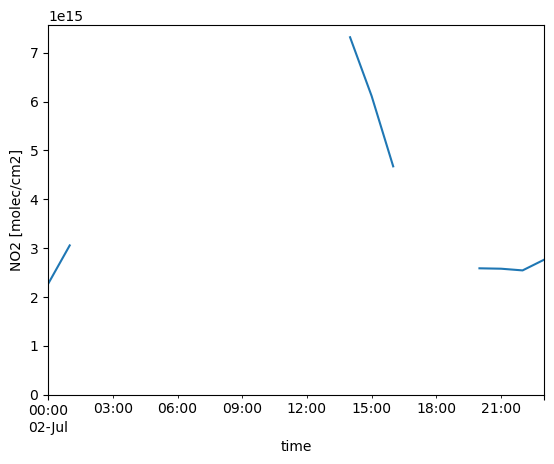

In [12]:
# Plot a data column selected from the names above
# This also allows us to visually see what times have data
tempocol = 'no2_vertical_column_troposphere'
ax = hdf[tempocol].plot(ylim=(0, None), ylabel='NO2 [molec/cm2]')

In [13]:
# Now retrieve a NetCDF file with IOAPI coordinates (like CMAQ)
# Might produce an error about the remote connection; rerunning the cell should fix it.
ds = api.to_ioapi(tempokey)
ds

Using cached: b200_july_2_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-07-02T000000Z_2024-07-02T235959Z.nc.gz
Using cached: b200_july_2_flight_2/tempo.l2.no2.vertical_column_troposphere_2024-07-02T000000Z_2024-07-02T235959Z.nc


<xarray.Dataset> Size: 32kB
Dimensions:          (TSTEP: 24, VAR: 4, DATE-TIME: 2, LAY: 1, ROW: 8, COL: 10)
Coordinates:
  * TSTEP            (TSTEP) datetime64[ns] 192B 2024-07-02 ... 2024-07-02T23...
  * LAY              (LAY) float32 4B 0.9975
  * ROW              (ROW) float64 64B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * COL              (COL) float64 80B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
Dimensions without coordinates: VAR, DATE-TIME
Data variables:
    TFLAG            (TSTEP, VAR, DATE-TIME) int32 768B ...
    LONGITUDE        (TSTEP, LAY, ROW, COL) float32 8kB ...
    LATITUDE         (TSTEP, LAY, ROW, COL) float32 8kB ...
    COUNT            (TSTEP, LAY, ROW, COL) int32 8kB ...
    NO2_VERTICAL_CO  (TSTEP, LAY, ROW, COL) float32 8kB ...
Attributes: (12/34)
    IOAPI_VERSION:  1.0 1997349 (Dec. 15, 1997)
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024214
    CTIME:          54
    WDATE:          2024214
    ...             ...
    GDNAM:          M_02_99BRACE    
    UPNAM:          XDRConvert      
    VAR-LIST:       LONGITUDE       LATITUDE        COUNT           NO2_VERTI...
    FILEDESC:       http://tempo.si.edu/,TEMPOSubset,XDRConvert              ...
    HISTORY:        XDRConvert
    crs_proj4:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [14]:
# Choose a column from above, notice that names are truncated, so they can be weird
tempoikey = 'NO2_VERTICAL_CO'

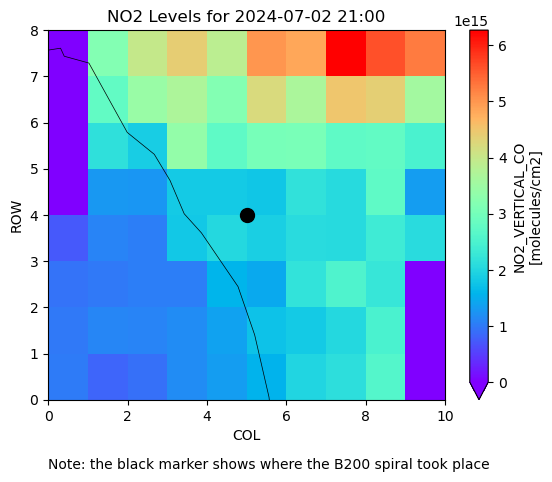

In [15]:
# Now plot a map using the pycno gridding package
# Documentation for the pycno package can be found in Dr. Hendrickson's GitHub
cno = pycno.cno(ds.crs_proj4)
time= 21 # Choose the UTC hour you'd like to plot
qm = ds[tempoikey].isel(TSTEP=time)

qm.plot(cmap='rainbow', vmin=0, vmax=qm.max().values) # Plotting with the desired colormap and handling missing values
cno.drawstates(resnum=1)

# Plotting a point on the graph using array indices
row_index = 4  # Center of the grid
col_index = 5  # Center of the grid
plt.scatter(col_index, row_index, color='black', s=100, zorder=5)  # Adjust the color, size (s), and zorder as needed

plt.title(f'NO2 Levels for {bdate} {time}:00')
plt.text(0, -1.5, "Note: the black marker shows where the B200 spiral took place")
plt.show()

In [16]:
# Now that we've graphed where the spiral took place via rows and columns, we can pull the TEMPO data value
values= ds.NO2_VERTICAL_CO.isel(COL= math.floor(col_index), ROW= math.floor(row_index)).values

# Pulling the TEMPO satellite value at desired time for this spiral
tempo_val= float(values[time])
print(f'TEMPO satellite {tempoikey} value is {tempo_val: .2e} ({tempo_val}) molec/cm^2 for {bdate} {time}:00 UTC')

TEMPO satellite NO2_VERTICAL_CO value is  1.78e+15 (1778309062983680.0) molec/cm^2 for 2024-07-02 21:00 UTC


## July 2 Flight #2 Flight Data

In [17]:
# Pulling data that was preprocessed in Excel
# The first few columns (before the first unnamed column) show the raw flight data for the spiral
# The next group of columns includes averaged data based on altitude
# temp_avg and press_avg are in Kelvin and atm, respectively
# Directly after that (with no unnamed column separating it), the molec_coeff... columns show the process //
# of converting the airborne data from pptv to molec/cm^2
# The column total_no2 shows the summed total of NO2 molecules in the spiral column, aiding in comparison //
# with the TEMPO satellite data (which is in molec/cm^2)
main_df= pd.read_csv("/home/jovyan/Flight Data/7_2_f2_no2_data.csv")
main_df

,Time_Start,Time_Stop,Latitude_deg_THORNHILL,Longitude_deg_THORNHILL,...,total_no2,Unnamed: 20,Unnamed: 21,ne aneheim elevation (ft)
0,76680,76681,33.915116,-117.884378,...,9.767990e+15,NaN,NaN,338.334447
1,76681,76682,33.914341,-117.882938,...,NaN,NaN,NaN,NaN
2,76682,76683,33.914341,-117.882938,...,NaN,NaN,NaN,NaN
3,76683,76684,33.913471,-117.881574,...,NaN,NaN,NaN,NaN
4,76684,76685,33.913471,-117.881574,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
656,77336,77337,33.869657,-117.856545,...,NaN,NaN,NaN,NaN
657,77337,77338,33.869954,-117.857945,...,NaN,NaN,NaN,NaN
658,77338,77339,33.869954,-117.857945,...,NaN,NaN,NaN,NaN
659,77339,77340,33.870247,-117.859354,...,NaN,NaN,NaN,NaN


In [18]:
# Pulling total_no2 value for comparative statistics
total_no2= main_df['total_no2'][0]
print(f'Flight data {tempoikey} value is {total_no2: .2e} ({total_no2}) molec/cm^2 for this spiral')

Flight data NO2_VERTICAL_CO value is  9.77e+15 (9767990000000000.0) molec/cm^2 for this spiral


## July 2 Flight #3 TEMPO Data

Note: the B200 started its spiral at 00:06 UTC July 3 (17:06 PDT July 2), peaked at 00:11 (17:11), and finished at 00:18 (17:18). The latitude and longitude of this spiral was approximately 34.1° x -117.2°.

In [19]:
locname = 'b200_july_2_flight_3'
lat_coord= 34.1156
long_coord= -117.2545
bbox = (long_coord - 0.5, lat_coord - 0.5, long_coord + 0.5, lat_coord + 0.5) # Limiting region to area of spiral
bdate = '2024-07-02'

In [20]:
# Getting access to the Remote Sensing Information Gateway (RSIG) data's API

api = pyrsig.RsigApi(bdate=bdate, bbox=bbox, workdir=locname, gridfit=True)
api_key = 'anonymous'  # using public data, so using anonymous
api.tempo_kw['api_key'] = api_key

In [21]:
# after the cell runs, click on the table button.
# Then use filters to find tempo data products by names that start with tempo
# This enables you to see what data products are available
# NOTE: descdf.query('name.str.contains("tempo")') shows all tempo data products you can access //
# (good for plotting different variables than NO2)

descdf = api.descriptions()
descdf
descdf.query('name.str.contains("tempo.l2.no2")')

,name,label,description,bbox_str,beginPosition,timeResolution,endPosition,prefix
1309,tempo.l2.no2.solar_zenith_angle,l2.no2.solar_zenith_angle(deg),Solar zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1310,tempo.l2.no2.solar_azimuth_angle,l2.no2.solar_azimuth_angle(deg),Solar azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1311,tempo.l2.no2.viewing_zenith_angle,l2.no2.viewing_zenith_angle(deg),Viewing zenith angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1312,tempo.l2.no2.viewing_azimuth_angle,l2.no2.viewing_azimuth_angle(deg),Viewing azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1313,tempo.l2.no2.relative_azimuth_angle,l2.no2.relative_azimuth_angle(deg),Relative azimuth angle at pixel center.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
...,...,...,...,...,...,...,...,...
1331,tempo.l2.no2.amf_cloud_pressure,l2.no2.amf_cloud_pressure(-),Cloud pressure for AMF computation.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1332,tempo.l2.no2.amf_troposphere,l2.no2.amf_troposphere(-),Nitrogen dioxide tropospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1333,tempo.l2.no2.amf_stratosphere,l2.no2.amf_stratosphere(-),Nitrogen dioxide stratospheric air mass factor.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo
1334,tempo.l2.no2.fit_rms_residual,l2.no2.fit_rms_residual(-),Radiance fit RMS residual.,-180 -90 180 90,2023-10-17T00:00:00Z,PT1Y,now,tempo


In [22]:
# Choosing to map TEMPO's vertical column NO2
tempokey = 'tempo.l2.no2.vertical_column_troposphere'

In [23]:
# Creating a data frame with time as the index
# xdr is used here for speed
df = api.to_dataframe(tempokey, backend='xdr')
df_time_index = df.set_index("Timestamp(UTC)")
df_time_index

Using cached: b200_july_2_flight_3/tempo.l2.no2.vertical_column_troposphere_2024-07-02T000000Z_2024-07-02T235959Z.xdr.gz


,LONGITUDE(deg),LATITUDE(deg),no2_vertical_column_troposphere(molecules/cm2),Longitude_SW(deg),...,Latitude_SW(deg),Latitude_SE(deg),Latitude_NW(deg),Latitude_NE(deg)
Timestamp(UTC),,,,,,,,,
2024-07-02T00:20:00+0000,-117.039162,34.988567,1.646991e+15,-117.012381,...,34.997163,35.000562,34.978363,34.981615
2024-07-02T00:20:00+0000,-117.103752,34.993389,2.483878e+15,-117.075396,...,35.000562,35.004595,34.981615,34.985717
2024-07-02T00:20:00+0000,-117.167023,34.996929,2.353270e+15,-117.139183,...,35.004595,35.007702,34.985717,34.988702
2024-07-02T00:20:00+0000,-117.229012,34.999527,1.944231e+15,-117.201862,...,35.007702,35.010536,34.988702,34.991504
2024-07-02T00:20:00+0000,-117.031807,34.969883,2.215733e+15,-117.004910,...,34.978363,34.981615,34.959820,34.963037
...,...,...,...,...,...,...,...,...,...
2024-07-02T23:47:00+0000,-117.760956,34.008938,7.806901e+15,-117.734091,...,34.017420,34.020190,33.998874,34.001412
2024-07-02T23:47:00+0000,-117.824333,34.012642,8.066494e+15,-117.796484,...,34.020190,34.023046,34.001412,34.004539
2024-07-02T23:47:00+0000,-117.886124,34.015282,1.019986e+16,-117.858734,...,34.023046,34.026198,34.004539,34.007802


In [24]:
# Do it again, but cleanup the keys and add time object
# Notice that the file is reused
df = api.to_dataframe(tempokey, unit_keys=False, parse_dates=True, backend='xdr')
df

Using cached: b200_july_2_flight_3/tempo.l2.no2.vertical_column_troposphere_2024-07-02T000000Z_2024-07-02T235959Z.xdr.gz


,Timestamp,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,...,Latitude_SE,Latitude_NW,Latitude_NE,time
0,2024-07-02T00:20:00+0000,-117.039162,34.988567,1.646991e+15,...,35.000562,34.978363,34.981615,2024-07-02 00:20:00+00:00
1,2024-07-02T00:20:00+0000,-117.103752,34.993389,2.483878e+15,...,35.004595,34.981615,34.985717,2024-07-02 00:20:00+00:00
2,2024-07-02T00:20:00+0000,-117.167023,34.996929,2.353270e+15,...,35.007702,34.985717,34.988702,2024-07-02 00:20:00+00:00
3,2024-07-02T00:20:00+0000,-117.229012,34.999527,1.944231e+15,...,35.010536,34.988702,34.991504,2024-07-02 00:20:00+00:00
4,2024-07-02T00:20:00+0000,-117.031807,34.969883,2.215733e+15,...,34.981615,34.959820,34.963037,2024-07-02 00:20:00+00:00
...,...,...,...,...,...,...,...,...,...
165,2024-07-02T23:47:00+0000,-117.760956,34.008938,7.806901e+15,...,34.020190,33.998874,34.001412,2024-07-02 23:47:00+00:00
166,2024-07-02T23:47:00+0000,-117.824333,34.012642,8.066494e+15,...,34.023046,34.001412,34.004539,2024-07-02 23:47:00+00:00
167,2024-07-02T23:47:00+0000,-117.886124,34.015282,1.019986e+16,...,34.026198,34.004539,34.007802,2024-07-02 23:47:00+00:00
168,2024-07-02T23:47:00+0000,-117.949738,34.018818,1.272927e+16,...,34.029647,34.007802,34.010595,2024-07-02 23:47:00+00:00


In [25]:
# Making an hourly average since TEMPO returns hourly measurements
hdf = df.groupby(pd.Grouper(key='time', freq='1h')).mean(numeric_only=True)
hdf

,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,...,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE
time,,,,,,,,,
2024-07-02 00:00:00+00:00,-117.499388,34.495663,4.237235e+15,-117.471884,...,34.503543,34.506512,34.484821,34.487802
2024-07-02 01:00:00+00:00,-117.498895,34.495042,5.451515e+15,-117.471397,...,34.502902,34.505944,34.484176,34.487219
2024-07-02 02:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-02 03:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-02 04:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-07-02 19:00:00+00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
2024-07-02 20:00:00+00:00,-117.499800,34.495306,3.533854e+15,-117.472214,...,34.503170,34.506140,34.484457,34.487429
2024-07-02 21:00:00+00:00,-117.500428,34.493529,3.400639e+15,-117.472914,...,34.501383,34.504379,34.482671,34.485671


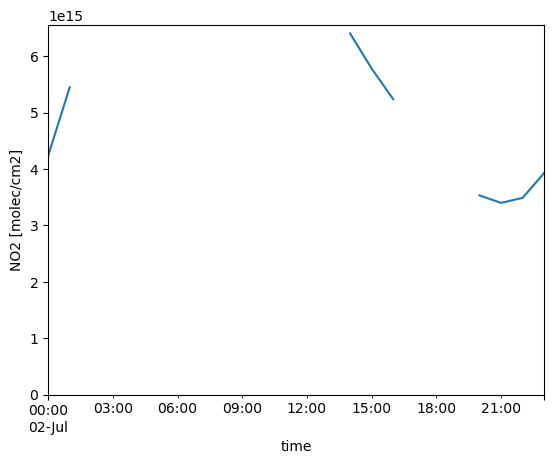

In [26]:
# Plot a data column selected from the names above
# This also allows us to visually see what times have data
tempocol = 'no2_vertical_column_troposphere'
ax = hdf[tempocol].plot(ylim=(0, None), ylabel='NO2 [molec/cm2]')

In [27]:
# Now retrieve a NetCDF file with IOAPI coordinates (like CMAQ)
# Might produce an error about the remote connection; rerunning the cell should fix it.
ds = api.to_ioapi(tempokey)
ds

Using cached: b200_july_2_flight_3/tempo.l2.no2.vertical_column_troposphere_2024-07-02T000000Z_2024-07-02T235959Z.nc.gz
Using cached: b200_july_2_flight_3/tempo.l2.no2.vertical_column_troposphere_2024-07-02T000000Z_2024-07-02T235959Z.nc


<xarray.Dataset> Size: 32kB
Dimensions:          (TSTEP: 24, VAR: 4, DATE-TIME: 2, LAY: 1, ROW: 8, COL: 10)
Coordinates:
  * TSTEP            (TSTEP) datetime64[ns] 192B 2024-07-02 ... 2024-07-02T23...
  * LAY              (LAY) float32 4B 0.9975
  * ROW              (ROW) float64 64B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * COL              (COL) float64 80B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
Dimensions without coordinates: VAR, DATE-TIME
Data variables:
    TFLAG            (TSTEP, VAR, DATE-TIME) int32 768B ...
    LONGITUDE        (TSTEP, LAY, ROW, COL) float32 8kB ...
    LATITUDE         (TSTEP, LAY, ROW, COL) float32 8kB ...
    COUNT            (TSTEP, LAY, ROW, COL) int32 8kB ...
    NO2_VERTICAL_CO  (TSTEP, LAY, ROW, COL) float32 8kB ...
Attributes: (12/34)
    IOAPI_VERSION:  1.0 1997349 (Dec. 15, 1997)
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024222
    CTIME:          2324
    WDATE:          2024222
    ...             ...
    GDNAM:          M_02_99BRACE    
    UPNAM:          XDRConvert      
    VAR-LIST:       LONGITUDE       LATITUDE        COUNT           NO2_VERTI...
    FILEDESC:       http://tempo.si.edu/,TEMPOSubset,XDRConvert              ...
    HISTORY:        XDRConvert
    crs_proj4:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [28]:
# Choose a column from above, notice that names are truncated, so they can be weird
tempoikey = 'NO2_VERTICAL_CO'

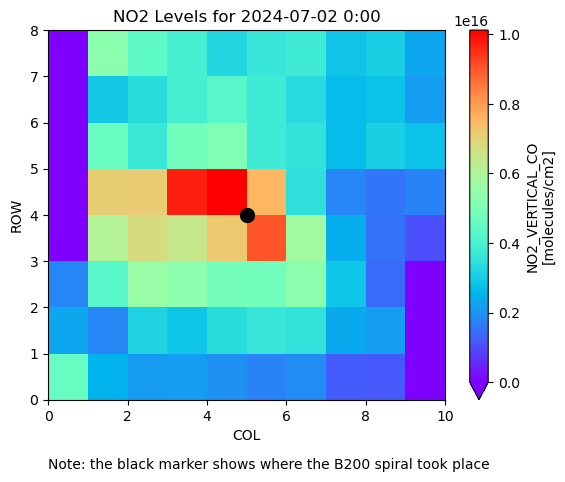

In [29]:
# Now plot a map using the pycno gridding package
# Documentation for the pycno package can be found in Dr. Hendrickson's GitHub
cno = pycno.cno(ds.crs_proj4)
time= 00 # Choose the UTC hour you'd like to plot
qm = ds[tempoikey].isel(TSTEP=time)

qm.plot(cmap='rainbow', vmin=0, vmax=qm.max().values) # Plotting with the desired colormap and handling missing values
cno.drawstates(resnum=1)

# Plotting a point on the graph using array indices
row_index = 4  # Center of the grid
col_index = 5  # Center of the grid
plt.scatter(col_index, row_index, color='black', s=100, zorder=5)  # Adjust the color, size (s), and zorder as needed

plt.title(f'NO2 Levels for {bdate} {time}:00')
plt.text(0, -1.5, "Note: the black marker shows where the B200 spiral took place")
plt.show()

In [30]:
# Now that we've graphed where the spiral took place via rows and columns, we can pull the TEMPO data value
values= ds.NO2_VERTICAL_CO.isel(COL= math.floor(col_index), ROW= math.floor(row_index)).values

# Pulling the TEMPO satellite value at desired time for this spiral
tempo_val= float(values[time])
print(f'TEMPO satellite {tempoikey} value is {tempo_val: .2e} ({tempo_val}) molec/cm^2 for {bdate} {time}:00 UTC')

TEMPO satellite NO2_VERTICAL_CO value is  7.53e+15 (7528010370514944.0) molec/cm^2 for 2024-07-02 0:00 UTC


## July 2 Flight #3 Flight Data

In [31]:
# Pulling data that was preprocessed in Excel
# The first few columns (before the first unnamed column) show the raw flight data for the spiral
# The next group of columns includes averaged data based on altitude
# temp_avg and press_avg are in Kelvin and atm, respectively
# Directly after that (with no unnamed column separating it), the molec_coeff... columns show the process //
# of converting the airborne data from pptv to molec/cm^2
# The column total_no2 shows the summed total of NO2 molecules in the spiral column, aiding in comparison //
# with the TEMPO satellite data (which is in molec/cm^2)
main_df= pd.read_csv("/home/jovyan/Flight Data/7_2_f3_no2_data.csv")
main_df

,Time_Start,Time_Stop,Latitude_deg_THORNHILL,Longitude_deg_THORNHILL,...,total_no2,Unnamed: 20,Unnamed: 21,san bernadino elevation (ft)
0,86780,86781,34.091037,-117.266899,...,1.058180e+15,NaN,NaN,1234.041889
1,86781,86782,34.091518,-117.265060,...,NaN,NaN,NaN,NaN
2,86782,86783,34.091518,-117.265060,...,NaN,NaN,NaN,NaN
3,86783,86784,34.092054,-117.263240,...,NaN,NaN,NaN,NaN
4,86784,86785,34.092054,-117.263240,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
696,87476,87477,34.125552,-117.242241,...,NaN,NaN,NaN,NaN
697,87477,87478,34.126432,-117.240871,...,NaN,NaN,NaN,NaN
698,87478,87479,34.126432,-117.240871,...,NaN,NaN,NaN,NaN
699,87479,87480,34.127285,-117.239520,...,NaN,NaN,NaN,NaN


In [32]:
# Pulling total_no2 value for comparative statistics
total_no2= main_df['total_no2'][0]
print(f'Flight data {tempoikey} value is {total_no2: .2e} ({total_no2}) molec/cm^2 for this spiral')

Flight data NO2_VERTICAL_CO value is  1.06e+15 (1058180000000000.0) molec/cm^2 for this spiral
